# HDF- Main structure

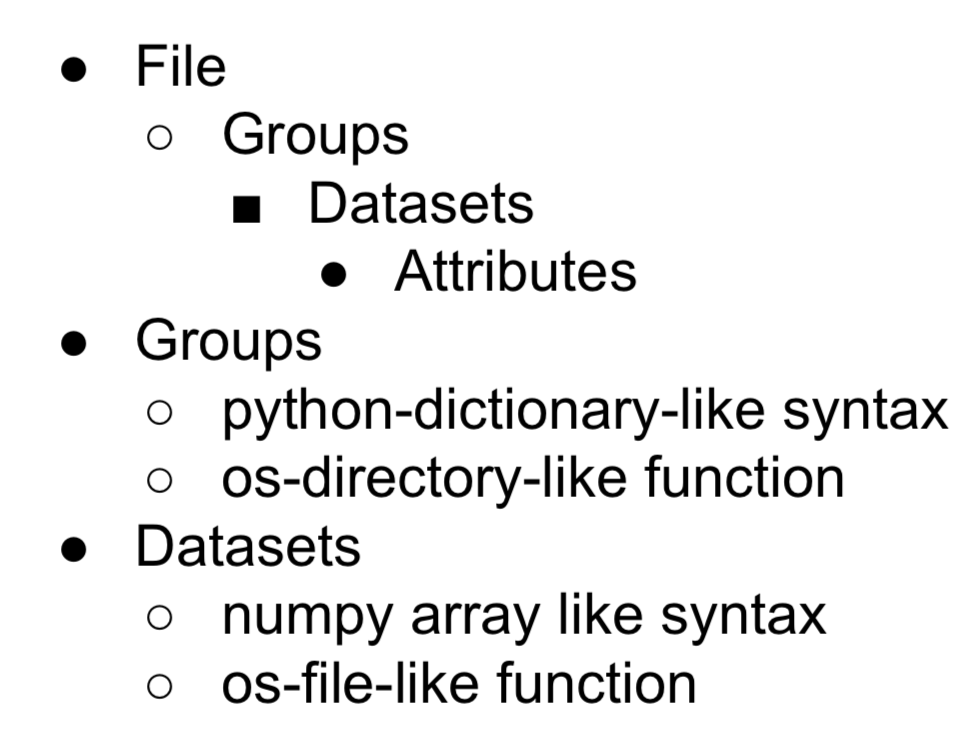

In [1]:
import h5py #genel bir kütüphane C++ ile yazılmış. Arkada hdf işlerini çalıştıran kodları çalıştırıyor.
import numpy as np

- open a hdf file

In [2]:
f=h5py.File("mytestfile.hdf5","w")

- create a dataset

In [3]:
dset=f.create_dataset("mydataset",(100,),dtype="i")

In [4]:
dset.name

'/mydataset'

In [5]:
dset.shape

(100,)

In [6]:
dset.dtype

dtype('int32')

## editing a dataset

In [7]:
dset[...]=np.arange(100)

In [8]:
dset[:]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int32)

In [9]:
dset[0]

0

In [10]:
dset[10]

10

In [11]:
dset[:]=np.arange(100)*2

In [12]:
dset[0]

0

In [13]:
dset[1]

2

## creating a group

In [14]:
f.name #ilk root dosya oluşturuyor.

'/'

In [15]:
grp=f.create_group("subgroup")

In [16]:
grp2=grp.create_group("subsubgroup")

## creating a group again

In [17]:
dset3=f.create_dataset("subgroup2/dataset_three",(10,),dtype="i")

In [18]:
dset3.name

'/subgroup2/dataset_three'

In [19]:
dset3[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## accessing Datasets in groups

In [20]:
dataset_three=f['/subgroup2/dataset_three']

In [21]:
dataset_three.dtype

dtype('int32')

In [22]:
dataset_three.name

'/subgroup2/dataset_three'

In [23]:
dataset_three.value

/home/cemilcansaylan/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [24]:
dataset_three[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [25]:
dataset_three[0:5]

array([0, 0, 0, 0, 0], dtype=int32)

## loop through all datasets

In [36]:
for name in f:
    print(name)

mydataset
subgroup
subgroup2


In [27]:
type(dataset_three)

h5py._hl.dataset.Dataset

## Editing attributes

In [28]:
dset.attrs["temperature"]=99.5

In [39]:
dset.attrs["pressure"]=1.3

In [48]:
for a,b in dset.attrs.items(): #dictinary ile aynı özelliklere sahip onun komutları işe yarıyor.
    print(a,b)

pressure 1.3
temperature 99.5


In [29]:
dset.attrs["temperature"]

99.5

In [30]:
"temperature" in dset.attrs

True

### Specify data types to optimize space

In [49]:
arr = np.random.randint(0,10,(100000,))

f = h5py.File('integer_1.hdf5', 'w')
d = f.create_dataset('dataset', (100000,), dtype='i1')
d[:] = arr
f.close()

f = h5py.File('integer_8.hdf5', 'w')
d = f.create_dataset('dataset', (100000,), dtype='i8')
d[:] = arr
f.close()

f = h5py.File('float.hdf5', 'w')
d = f.create_dataset('dataset', (100000,), dtype='f16')
d[:] = arr
f.close()

In [52]:
a=h5py.File("integer_1.hdf5")

In [54]:
list(a)

['dataset']

## check the size of these files

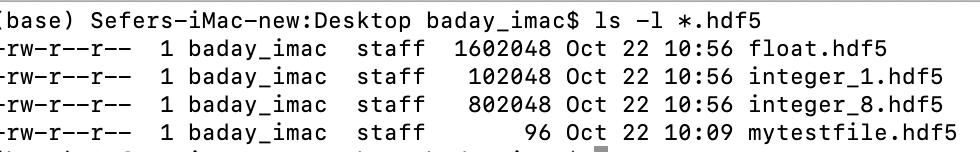

## compressing data

the parameters compression_opts sets the level of compression. The higher the level, the less space data takes but the longer the processor has to work. The default level is 4. 

In [ ]:
arr = np.random.randint(0,10,(100000,))

f = h5py.File('integer_1.hdf5', 'w')
d = f.create_dataset('dataset', (100000,), dtype='i1',compression="gzip", compression_opts=9)
d[:] = arr
f.close()

f = h5py.File('integer_8.hdf5', 'w')
d = f.create_dataset('dataset', (100000,), dtype='i8',compression="gzip", compression_opts=9)
d[:] = arr
f.close()

f = h5py.File('float.hdf5', 'w')
d = f.create_dataset('dataset', (100000,), dtype='f16',compression="gzip", compression_opts=9)
d[:] = arr
f.close()

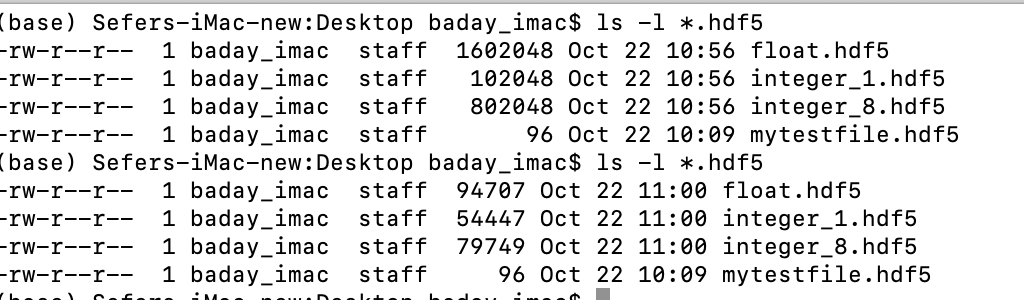

### Resizing datasets 

When you are working on an experiment, it may be impossible to know how big your data is going to be. Imagine you are recording a movie, perhaps you stop it after one second, perhaps after an hour. Fortunately, HDF5 allows resizing datasets on the fly and with little computational cost. Datasets can be resized once created up to a maximum size. You specify this maximum size when creating the dataset, via the keyword maxshape:

In [55]:
import h5py
import numpy as np

with h5py.File('resize_dataset.hdf5', 'w') as f:
    d = f.create_dataset('dataset', (100, ),  maxshape=(500, ))
    d[:100] = np.random.randn(100)
    d.resize((200,))
    d[100:200] = np.random.randn(100)

with h5py.File('resize_dataset.hdf5', 'r') as f:
    dset = f['dataset']
    print(dset[99])
    print(dset[199])

-0.6843756
0.1688958


First, you create a dataset to store 100 values and set a maximum size of up to 500 values. After you stored the first batch of values, you can expand the dataset to store the following 100. You can repeat the procedure up to a dataset with 500 values.

## ÖNEMLİ Another resize example on movie data

Imagine you are acquiring a movie but you don't know how long it will be. An image is a 2D array, each element being a pixel, and a movie is nothing more than stacking several 2D arrays. 
- To store movies we have to define a 3-dimensional array in our HDF file, but we don't want to set a limit to the duration. To be able to expand the third axis of our dataset without a fixed maximum, we can do as follows:

In [57]:
with h5py.File('movie_dataset.hdf5', 'w') as f:
   d = f.create_dataset('dataset', (1024, 1024, 1),  maxshape=(1024, 1024, None ))
   d[:,:,0] =np.random.randint(0,256,(1024,1024)) # first frame
   d.resize((1024,1024,2))
   d[:,:,1] =np.random.randint(0,256,(1024,1024)) # second frame

### Saving datas in Chunks 

- To optimize the storing of data you can opt to do it in chunks. 
- Each chunk will be contiguous on the hard drive and will be stored as a block, i.e. the entire chunk will be written at once.
- When reading a chunk, the same will happen, entire chunks are going to be loaded.

In [ ]:
f=h5py.File("new2.hdf5","w-")
dset = f.create_dataset("chunked", (1000, 1000), chunks=(100, 100))
f.close()

The command means that all the data in dset[0:100,0:100] will be stored together. 
<br> It is also true for dset[200:300, 200:300], dset[100:200, 400:500], etc. According to h5py, there are some performance implications while using chunks:

Also keep in mind that when any element in a chunk is accessed, the entire chunk is read from disk.

# Exercise

- open new hdf5 file with a name exercise.hdf5

In [66]:
f=h5py.File("excersie.hdf5","w")

- first create a group with a name "base_group"

In [67]:
g1=f.create_group("base_group")

- inside this base_group create another group with a name "sub_group"

In [68]:
g2=g1.create_group("sub_group")

- create a dataset in base_group with a name "default", for data assing 1000 random numbers

In [69]:
d1=g1.create_dataset("default",data=np.random.randn(1000))

- create a dataset in sub_group with a name "default", for data assing 1000 random numbers

In [70]:
d2=g2.create_dataset("default",data=np.random.randn(1000))

- close this file

In [71]:
f.close()

- now read the file exercise.hdf5 and print the first ten elements of each datasets

In [72]:
f=h5py.File("excersie.hdf5","r")

-check out all groups using f.keys(), write a for loop which prints all group names

In [73]:
for k in f.keys():
    print(k)

base_group


- note that we only see the top group
- in these nested structures either you use another for loop

In [75]:
for k in f.keys():
    print(k)
    for l in f[k].keys():
        print(l)

base_group
default
sub_group


### We can also use visit function 

In [76]:
def get_all(name):
    print(name)
f.visit(get_all)

base_group
base_group/default
base_group/sub_group
base_group/sub_group/default


- When we use the visit method, it takes as argument a function like get_all. visit will go through each element

### Storing Medata in HDF5 

Metadata is what makes a file self-descriptive. Imagine you open older data and you find a 200x300x250 matrix. Perhaps you know it is a movie, but you have no idea which dimension is time, nor the timestep between frames.

Storing metadata into an HDF5 file can be achieved in different ways. The official one is by adding attributes to groups and datasets.

In [80]:
import time
import numpy as np
import h5py
import os

arr = np.random.randn(1000)

with h5py.File('groups.hdf5', 'w') as f:
    g = f.create_group('Base_Group')
    d = g.create_dataset('default', data=arr)

    g.attrs['Date'] = time.time()
    g.attrs['User'] = 'Me'

    d.attrs['OS'] = os.name

    for k in g.attrs:
        print('{} => {}'.format(k, g.attrs[k]))

    for j in d.attrs.keys():
      print('{} => {}'.format(j, d.attrs[j]))


Date => 1571918806.9125822
User => Me
OS => posix


In principle, you shouldn't use attributes to store data, keep them as small as you can. However, you are not limited to single values, you can also store arrays. If you happen to have metadata stored in a dictionary and you want to add it automatically to the attributes, you can use update:

In [ ]:
with h5py.File('groups.hdf5', 'w') as f:
   g = f.create_group('Base_Group')
   d = g.create_dataset('default', data=arr)

   metadata = {'Date': time.time(),
      'User': 'Me',
      'OS': os.name,}

   f.attrs.update(metadata)

   for m in f.attrs.keys():
      print('{} => {}'.format(m, f.attrs[m]))

# netCDF: Creating a File

https://unidata.github.io/netcdf4-python/netCDF4/index.html

In [81]:
import netCDF4

To create a netCDF file from python, you simply call the Dataset constructor. This is also the method used to open an existing netCDF file. If the file is open for write access (mode='w', 'r+' or 'a'), you may write any type of data including new dimensions, groups, variables and attributes. 

In [82]:
rootgrp=netCDF4.Dataset("test.nc","w",format="NETCDF4")

In [83]:
rootgrp.data_model

'NETCDF4'

In [84]:
rootgrp.close()

# netCDF: Creating a group

 A Dataset creates a special group, called the 'root group', which is similar to the root directory in a unix filesystem

In [85]:
rootgrp=netCDF4.Dataset("test.nc", "a")

To create Group instances, use the createGroup method of a Dataset or Group instance. createGroup takes a single argument, a python string containing the name of the new group

In [86]:
fcstgrp = rootgrp.createGroup("forecasts")

In [87]:
analgrp = rootgrp.createGroup("analyses")

you can reach groups by groups attribute

In [88]:
rootgrp.groups

OrderedDict([('forecasts', <class 'netCDF4._netCDF4.Group'>
              group /forecasts:
                  dimensions(sizes): 
                  variables(dimensions): 
                  groups: ), ('analyses', <class 'netCDF4._netCDF4.Group'>
              group /analyses:
                  dimensions(sizes): 
                  variables(dimensions): 
                  groups: )])

### netCDF: Creating dimensions

netCDF defines the sizes of all variables in terms of dimensions, so before any variables can be created the dimensions they use must be created first

A dimension is created using the createDimension method of a Dataset or Group instance.

In [89]:
level = rootgrp.createDimension("level", None)

To create an unlimited dimension (a dimension that can be appended to), the size value is set to None or 0

In [90]:
time = rootgrp.createDimension("time", None)
lat = rootgrp.createDimension("lat", 73)
lon = rootgrp.createDimension("lon", 144)

- accessing dimensions

In [91]:
rootgrp.dimensions

OrderedDict([('level',
              <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'level', size = 0),
             ('time',
              <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0),
             ('lat',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 73),
             ('lon',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144)])

Calling the python len function with a Dimension instance returns the current size of that dimension

In [96]:
len(lon)

144

The isunlimited method of a Dimension instance can be used to determine if the dimensions is unlimited, or appendable.

In [93]:
print(lon.isunlimited())

False


In [94]:
print(time.isunlimited())

True


### going through all dimensions in a for loop 

In [95]:
for dimobj in rootgrp.dimensions.values():
    print(dimobj)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'level', size = 0

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 73

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144



## netCDF: Creating variables

The createVariable method has two mandatory arguments, the variable name (a Python string), and the variable datatype.

In [97]:
times = rootgrp.createVariable('time','f8',('time',))
levels = rootgrp.createVariable('level','i4',('level',))
latitudes = rootgrp.createVariable('latitude','f4',('lat',))
longitudes = rootgrp.createVariable('longitude','f4',('lon',))

In [98]:
temp = rootgrp.createVariable("temp","f4",("time","level","lat","lon",))

In [99]:
temp.units = "K" #attribute ekleme

In [108]:
temp.setncattr('test',200)

In [100]:
print(temp)

<class 'netCDF4._netCDF4.Variable'>
float32 temp(time, level, lat, lon)
    units: K
unlimited dimensions: time, level
current shape = (0, 0, 73, 144)
filling on, default _FillValue of 9.969209968386869e+36 used



In [134]:
latitude[:]

NameError: name 'latitude' is not defined

### to reach all variables 

In [109]:
rootgrp.variables

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
              unlimited dimensions: time
              current shape = (0,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('level', <class 'netCDF4._netCDF4.Variable'>
              int32 level(level)
              unlimited dimensions: level
              current shape = (0,)
              filling on, default _FillValue of -2147483647 used),
             ('latitude', <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(lat)
              unlimited dimensions: 
              current shape = (73,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('longitude', <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(lon)
              unlimited dimensions: 
              current shape = (144,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('temp',

- try to access temp variable

In [ ]:
rootgrp.variables["temp"]

### netCDF: Creating attributes

- There are two types of attributes in a netCDF file, global and variable. 
- Global attributes provide information about a group, or the entire dataset, as a whole. 
- Variable attributes provide information about one of the variables in a group. 
- Global attributes are set by assigning values to Dataset or Group instance variables. 
- Variable attributes are set by assigning values to Variable instances variables. 
- Attributes can be strings, numbers or sequences

In [110]:
import time
rootgrp.description = 'bogus example script'
rootgrp.history ='Created '+ time.ctime(time.time())
rootgrp.source = 'netCDF4 python module tutorial'
latitudes.units = 'degrees north'
longitudes.units = 'degrees east'
levels.units = 'hPa'
temp.units = 'K'
times.units = 'hours since 0001-01-01 00:00:00.0'
times.calendar = 'gregorian'
 

The __dict__ attribute of a Dataset, Group or Variable instance provides all the netCDF attribute name/value pairs in a python dictionary:

In [114]:
print(rootgrp.__dict__)

OrderedDict([('description', 'bogus example script'), ('history', 'Created Thu Oct 24 15:34:39 2019'), ('source', 'netCDF4 python module tutorial')])


### Writing data to and retrieving data from a netCDF variable.

In [116]:
import numpy
lats =  numpy.arange(-90,91,2.5)
lons =  numpy.arange(-180,180,2.5)
latitudes[:] = lats
longitudes[:] = lons
print("latitudes =\n{}".format(latitudes[:]))

latitudes =
[-90.  -87.5 -85.  -82.5 -80.  -77.5 -75.  -72.5 -70.  -67.5 -65.  -62.5
 -60.  -57.5 -55.  -52.5 -50.  -47.5 -45.  -42.5 -40.  -37.5 -35.  -32.5
 -30.  -27.5 -25.  -22.5 -20.  -17.5 -15.  -12.5 -10.   -7.5  -5.   -2.5
   0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85.   87.5
  90. ]


### append along two unlimited dimensions by assigning to slice.

In [117]:
nlats = len(rootgrp.dimensions["lat"])

In [118]:
nlats

73

In [119]:
nlons = len(rootgrp.dimensions["lon"])

In [120]:
nlons

144

In [121]:
print("temp shape before adding data = {}".format(temp.shape))

temp shape before adding data = (0, 0, 73, 144)


In [122]:
from numpy.random import uniform

In [123]:
temp[0:5, 0:10, :, :] = uniform(size=(5, 10, nlats, nlons))

In [124]:
print("temp shape after adding data = {}".format(temp.shape))

temp shape after adding data = (5, 10, 73, 144)


In [125]:
print("levels shape after adding pressure data = {}".format(levels.shape))

levels shape after adding pressure data = (10,)


Note that the size of the levels variable grows when data is appended along the level dimension of the variable temp, even though no data has yet been assigned to levels.

### now, assign data to levels dimension variable.

In [126]:
levels[:] =  [1000.,850.,700.,500.,300.,250.,200.,150.,100.,50.]

### Dealing with time coordinates.

- Time coordinate values pose a special challenge to netCDF users. 
- Most metadata standards (such as CF) specify that time should be measure relative to a fixed date using a certain calendar, with units specified like hours since YY-MM-DD hh:mm:ss. 
- These units can be awkward to deal with, without a utility to convert the values to and from calendar dates

The function called num2date and date2num are provided with this package to do just that

In [127]:
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num

In [128]:
dates = [datetime(2001,3,1)+n*timedelta(hours=12) for n in range(temp.shape[0])]

In [129]:
times[:] = date2num(dates,units=times.units,calendar=times.calendar)

In [130]:
print("time values (in units {}):\n{}".format(times.units, times[:]))

time values (in units hours since 0001-01-01 00:00:00.0):
[17533104. 17533116. 17533128. 17533140. 17533152.]


In [131]:
dates = num2date(times[:],units=times.units,calendar=times.calendar)

In [132]:
print("dates corresponding to time values:\n{}".format(dates))

dates corresponding to time values:
[real_datetime(2001, 3, 1, 0, 0) real_datetime(2001, 3, 1, 12, 0)
 real_datetime(2001, 3, 2, 0, 0) real_datetime(2001, 3, 2, 12, 0)
 real_datetime(2001, 3, 3, 0, 0)]


num2date converts numeric values of time in the specified units and calendar to datetime objects, and date2num does the reverse